In [16]:
from keras.datasets import fashion_mnist
import keras
from keras.models import Model
from keras.layers import Input, Conv2D, Dense, Flatten, Dropout
import pandas as pd
import numpy as np

In [17]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train, X_test = X_train/255, X_test/255

In [18]:
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)
print(X_train.shape)

(60000, 28, 28, 1)


In [19]:
K = len(set(y_train))
K

10

In [20]:
i = Input(shape=X_train[0].shape)
x = Conv2D(32, (3, 3), strides=2, activation='relu')(i)
x = Conv2D(64, (3, 3), strides=2, activation='relu')(x)
x = Conv2D(128, (3, 3), strides=2, activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)
model = Model(i, x)

In [21]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [22]:
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5166 - accuracy: 0.8088 - val_loss: 0.4380 - val_accuracy: 0.8376
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3572 - accuracy: 0.8660 - val_loss: 0.3404 - val_accuracy: 0.8768
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3061 - accuracy: 0.8848 - val_loss: 0.3131 - val_accuracy: 0.8859
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2725 - accuracy: 0.8978 - val_loss: 0.2990 - val_accuracy: 0.8918
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2468 - accuracy: 0.9061 - val_loss: 0.2929 - val_accuracy: 0.8944


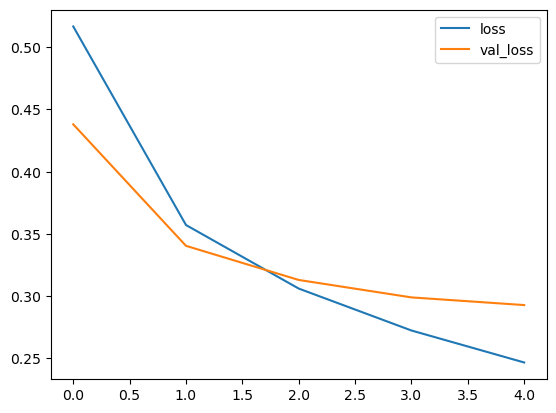

In [23]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

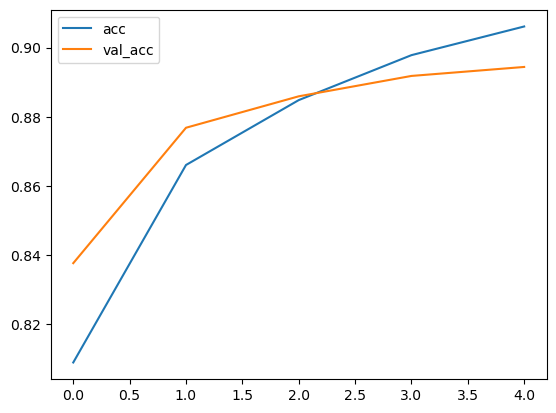

In [24]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()